/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


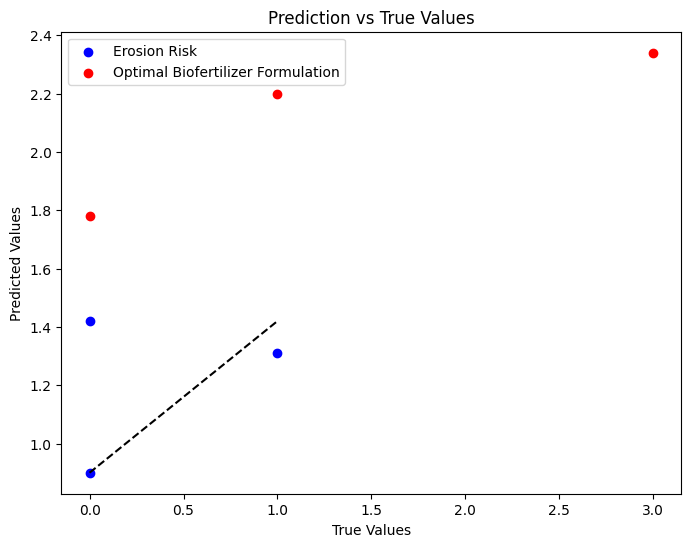

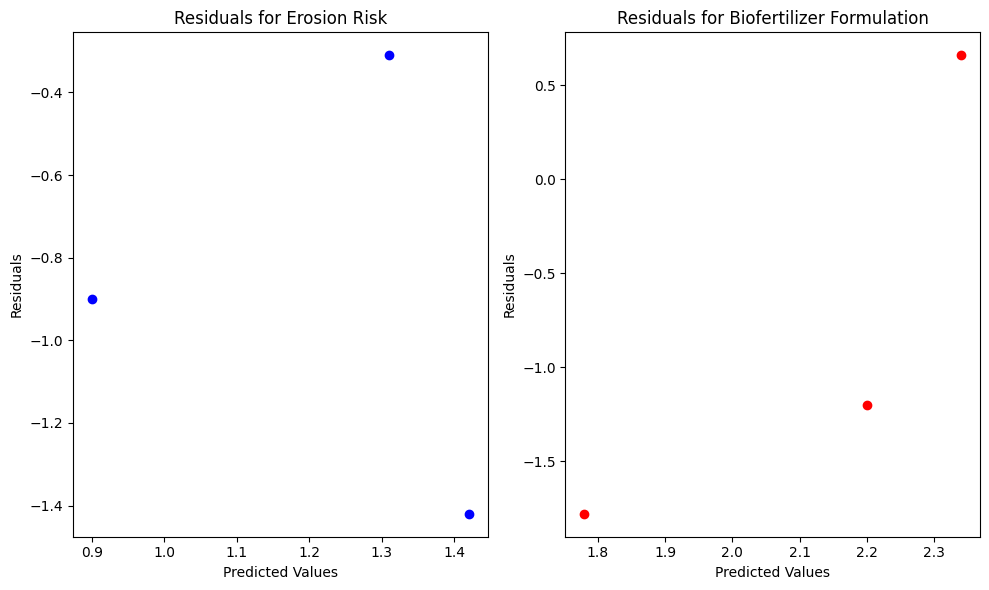

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('SoilDataset_Extended (1).csv')

categorical_columns = ['Erosion Risk', 'Optimal Biofertilizer Formulation']


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.iloc[:, :-2]
y = data[['Erosion Risk', 'Optimal Biofertilizer Formulation']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

input = [	3.0,6.9,	3.2,	30.1,19.0, 12.5,120.0,35.0,31.0,32.0,100000000.0,15.0,5.5,16.0]


predicted = model.predict([input])[0]
predicted_erosion_risk = label_encoders['Erosion Risk'].inverse_transform([round(predicted[0])])[0]
predicted_biofertilizer = label_encoders['Optimal Biofertilizer Formulation'].inverse_transform([round(predicted[1])])[0]

print(f"Predicted Erosion Risk: {predicted_erosion_risk}")
print(f"Predicted Biofertilizer Formulation: {predicted_biofertilizer}")



y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test['Erosion Risk'], y_pred[:, 0], color='blue', label='Erosion Risk')
plt.scatter(y_test['Optimal Biofertilizer Formulation'], y_pred[:, 1], color='red', label='Optimal Biofertilizer Formulation')
plt.plot([min(y_test['Erosion Risk']), max(y_test['Erosion Risk'])], [min(y_pred[:, 0]), max(y_pred[:, 0])], color='black', linestyle='--')
plt.title('Prediction vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

residuals_erosion = y_test['Erosion Risk'] - y_pred[:, 0]
residuals_biofertilizer = y_test['Optimal Biofertilizer Formulation'] - y_pred[:, 1]

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals_erosion, color='blue')
plt.title('Residuals for Erosion Risk')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals_biofertilizer, color='red')
plt.title('Residuals for Biofertilizer Formulation')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


